In [1]:
import pandas as pd

In [2]:
df_clients = pd.read_excel('case.xlsx', sheet_name='clients')
df_stores = pd.read_excel('case.xlsx', sheet_name='stores')
df_products = pd.read_excel('case.xlsx', sheet_name='products')
df_sales = pd.read_excel('case.xlsx', sheet_name='sales')
df_payments = pd.read_excel('case.xlsx', sheet_name='payments')

# First Analysis

In [3]:
df_clients.sample(5)

,id,name,sex,birth_date
291,292,Leonor Oliveira,F,7/28/1986
934,935,Lucas Almeida,M,2/14/1936
781,782,Tiago Ferreira,M,12/19/1938
252,253,Matilde Gomes,F,5/15/2003
63,64,Tânia Costa,F,5/13/1959


In [4]:
df_clients.head(5)

,id,name,sex,birth_date
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953


In [5]:
df_clients.tail(5)

,id,name,sex,birth_date
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994
999,1000,Gustavo Barbosa,M,12/30/1975


In [6]:
df_clients.isnull().sum()

id            0
name          4
sex           4
birth_date    4
dtype: int64

In [7]:
df_clients[df_clients.isnull().T.any()]

,id,name,sex,birth_date
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [8]:
df_clients.sex.unique()

array(['F', 'M', nan], dtype=object)

In [9]:
df_products

,id,product,value
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


<AxesSubplot:>

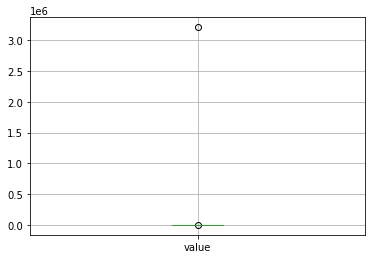

In [10]:
df_products.boxplot(column=['value'])

In [11]:
df_products[df_products.value > 300000]

,id,product,value
9,10,xxx-231a,3211352.0


<AxesSubplot:>

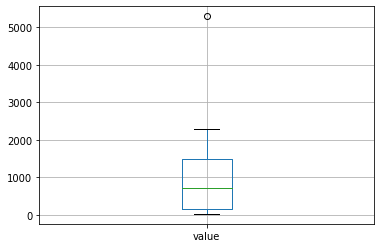

In [12]:
df_products[df_products.value < 300000].boxplot(column=['value'])

In [13]:
# discovering if that problematic product was sold
df_sales[df_sales.id_product==10].count()

id            182
id_cliente    182
id_store      182
id_product    182
dt_sale       182
dtype: int64

In [14]:
df_sales.isnull().sum()

id            0
id_cliente    0
id_store      0
id_product    0
dt_sale       0
dtype: int64

In [15]:
df_sales.describe()

,id,id_cliente,id_store,id_product
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,500.763667,4.538333,4.435000
std,866.169729,285.322282,2.922221,2.511018
min,1.000000,1.000000,1.000000,1.000000
25%,750.750000,254.750000,2.000000,3.000000
50%,1500.500000,503.500000,4.000000,3.000000
75%,2250.250000,742.000000,7.000000,6.000000
max,3000.000000,1000.000000,10.000000,10.000000


In [16]:
df_payments.isnull().sum()

id            0
id_sale       0
dt_payment    0
dtype: int64

In [17]:
df_payments.describe()

,id,id_sale
count,2072.000000,2072.000000
mean,1036.500000,1491.731660
std,598.279199,864.865583
min,1.000000,1.000000
25%,518.750000,746.250000
50%,1036.500000,1501.500000
75%,1554.250000,2220.500000
max,2072.000000,2997.000000


# Data Cleaning

## Null Data

In [18]:
df_clients[df_clients.name.isnull()]

,id,name,sex,birth_date
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN


In [19]:
df_clients[df_clients.birth_date.isnull()]

,id,name,sex,birth_date
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN


In [20]:
df_clients[df_clients.sex.isnull()]

,id,name,sex,birth_date
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [21]:
df_clients.loc[df_clients.name.isnull(), 'name'] = 'No Name'
df_clients.loc[df_clients.sex.isnull(), 'sex'] = 'O'
df_clients.loc[df_clients.birth_date.isnull(), 'birth_date'] = '1/1/2020'

In [22]:
df_clients.loc[[269,287], :]

,id,name,sex,birth_date
269,270,No Name,M,1/1/2020
287,288,Victor Ribeiro,O,12/17/1974


In [23]:
# Now we have no null datag
df_clients.isnull().sum()

id            0
name          0
sex           0
birth_date    0
dtype: int64

## Outliers

<AxesSubplot:>

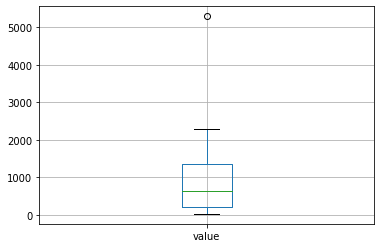

In [24]:
df_products.loc[9,'value'] = df_products.value[9] / 10000
df_products.boxplot(column=['value'])

## Consistency

In [25]:
df_sales[~df_sales.id_cliente.isin(df_clients.id)]

,id,id_cliente,id_store,id_product,dt_sale


In [26]:
df_sales[~df_sales.id_store.isin(df_stores.id)]

,id,id_cliente,id_store,id_product,dt_sale


In [27]:
df_sales[~df_sales.id_product.isin(df_products.id)]

,id,id_cliente,id_store,id_product,dt_sale


In [28]:
df_payments[~df_payments.id_sale.isin(df_sales.id)]

,id,id_sale,dt_payment


In [29]:
df_sales[~df_sales.id.isin(df_payments.id_sale)]

,id,id_cliente,id_store,id_product,dt_sale
3,4,59,4,3,2018-01-05
5,6,52,8,3,2018-01-05
20,21,270,2,10,2018-01-12
21,22,465,2,3,2018-01-12
32,33,459,2,7,2018-01-13
...,...,...,...,...,...
2992,2993,764,2,7,2020-09-25
2994,2995,6,2,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


## Duplicated Data

In [30]:
df_clients[df_clients.name.duplicated()]

,id,name,sex,birth_date
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [31]:
df_clients.drop('id', axis=1).duplicated().sum()

0

In [32]:
df_stores.city.duplicated().sum()

0

In [33]:
df_products['product'].duplicated().sum()

0

In [34]:
df_sales[df_sales.drop('id', axis=1).duplicated()]

,id,id_cliente,id_store,id_product,dt_sale
496,497,559,2,5,2018-06-22


In [35]:
df_sales[(df_sales.id_cliente==559) & (df_sales.id_store==2) & (df_sales.id_product==5)]

,id,id_cliente,id_store,id_product,dt_sale
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [36]:
df_payments.drop('id', axis=1).duplicated().sum()

0

## Data Formatting

In [37]:
df_clients.birth_date = pd.to_datetime(df_clients.birth_date, format='%m/%d/%Y')
df_clients.sample()

,id,name,sex,birth_date
525,526,Diogo Melo,M,1951-06-10


In [38]:
df_payments.sample()

,id,id_sale,dt_payment
1704,1705,2444,2020-05-03


In [39]:
df_products.sample()

,id,product,value
0,1,mouse,20.0


In [40]:
df_stores.sample()

,id,city
3,4,Belo Horizonte


## Indexes

In [41]:
df_clients = df_clients.set_index('id')
df_stores = df_stores.set_index('id')
df_payments = df_payments.set_index('id')
df_products = df_products.set_index('id')
df_sales = df_sales.set_index('id')

# Data Fusion

In [42]:
df = df_sales.join(df_clients.add_prefix('client_'), on='id_cliente')
df = df.join(df_stores.add_prefix('store_'), on='id_store')
df = df.join(df_products.add_prefix('product_'), on='id_product')
df.sample()

,id_cliente,id_store,id_product,dt_sale,client_name,client_sex,client_birth_date,store_city,product_product,product_value
id,,,,,,,,,,
82,724,8,3,2018-01-30,Paulo Goncalves,M,1979-11-11,Brasília,laptop básico,2300.0


In [43]:
df = df.join(df_payments.set_index('id_sale'))
df.sample()

,id_cliente,id_store,id_product,dt_sale,client_name,client_sex,client_birth_date,store_city,product_product,product_value,dt_payment
id,,,,,,,,,,,
225,42,6,4,2018-03-27,Gabriela Cavalcanti,F,1983-02-11,Recife,laptop gamer,5300.0,2018-05-03


In [44]:
df.isnull().sum()

id_cliente             0
id_store               0
id_product             0
dt_sale                0
client_name            0
client_sex             0
client_birth_date      0
store_city             0
product_product        0
product_value          0
dt_payment           928
dtype: int64

# Feature Engineering

In [45]:
df['paid'] = 1
df.loc[df.dt_payment.isnull(), 'paid'] = 0
df

,id_cliente,id_store,id_product,dt_sale,client_name,client_sex,client_birth_date,store_city,product_product,product_value,dt_payment,paid
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [46]:
df['days_to_pay'] = (df.dt_payment - df.dt_sale).dt.days
df

,id_cliente,id_store,id_product,dt_sale,client_name,client_sex,client_birth_date,store_city,product_product,product_value,dt_payment,paid,days_to_pay
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [47]:
import numpy as np
df['client_age'] = np.floor((pd.to_datetime('today') - df.client_birth_date)/np.timedelta64(1, 'Y'))
df

,id_cliente,id_store,id_product,dt_sale,client_name,client_sex,client_birth_date,store_city,product_product,product_value,dt_payment,paid,days_to_pay,client_age
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,71.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,49.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,58.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,79.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,21.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,27.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,34.0


# Analysis

In [48]:
graph_data = df.groupby('store_city').count().product_value.sort_values(ascending=False)

Text(0.5, 1.0, 'vendas por loja')

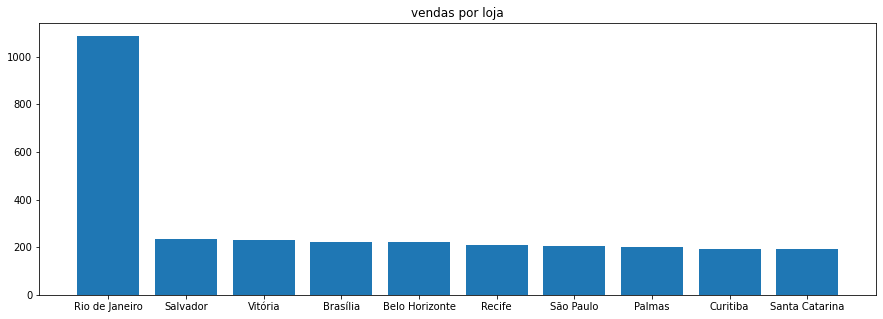

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(graph_data.index, graph_data.values)
plt.title('vendas por loja')

## Most sold products

In [50]:
graph_product_sold = df.groupby('product_product').count().product_value.sort_values(ascending=False)
graph_product_sold

product_product
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: product_value, dtype: int64

Text(0.5, 1.0, 'Sales by Product')

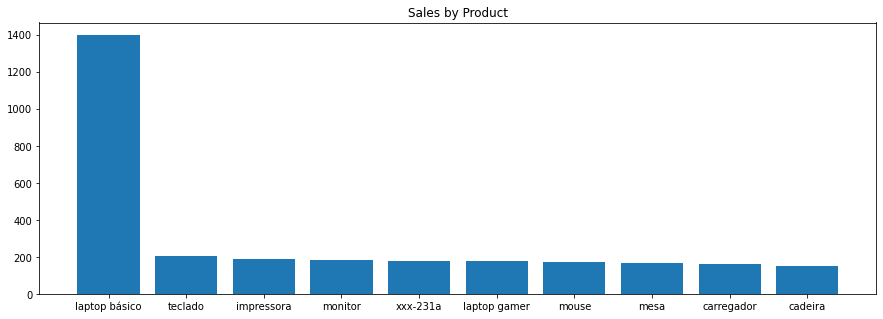

In [51]:
plt.figure(figsize=(15,5))
plt.bar(graph_product_sold.index, graph_product_sold.values)
plt.title('Sales by Product')

## Store Analysis

In [52]:
# These are the same, but I prefer the sort using the by, it seems clearer, but the first one leaves us a series, and the second one a dataframe...
df[['store_city','product_value']].groupby('store_city').sum().product_value.sort_values(ascending=False)
df[['store_city','product_value']].groupby('store_city').sum().sort_values(ascending=False, by="product_value")

,product_value
store_city,
Rio de Janeiro,1.797907e+06
Brasília,3.779836e+05
Belo Horizonte,3.757225e+05
Salvador,3.752382e+05
Vitória,3.655850e+05
São Paulo,3.407579e+05
Recife,3.329236e+05
Palmas,3.168370e+05
Santa Catarina,3.133314e+05


<BarContainer object of 10 artists>

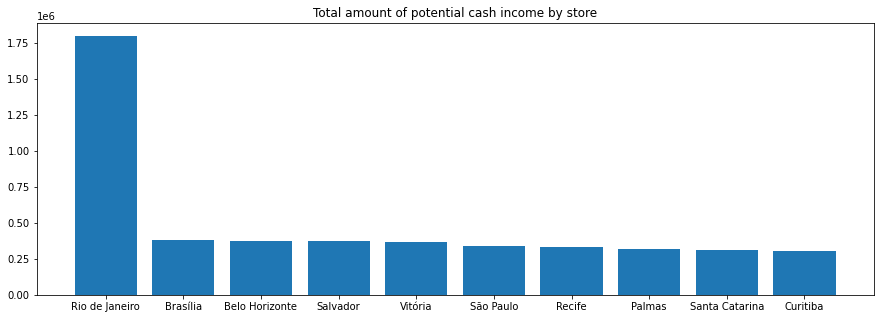

In [53]:
graph_data = df[['store_city','product_value']].groupby('store_city').sum().product_value.sort_values(ascending=False)
plt.figure(figsize=(15,5))
plt.title('Total amount of potential cash income by store')
plt.bar(graph_data.index, graph_data.values)

In [54]:
max_value = graph_data.max()
others_mean = graph_data[graph_data!=graph_data.max()].mean()
times_greater_than_mean = graph_data.max()/others_mean
print('The max value is %i, and it is %.2f times greater than the mean of the other values, which is %i' % (max_value, times_greater_than_mean, others_mean))

The max value is 1797906, and it is 5.22 times greater than the mean of the other values, which is 344624


<BarContainer object of 10 artists>

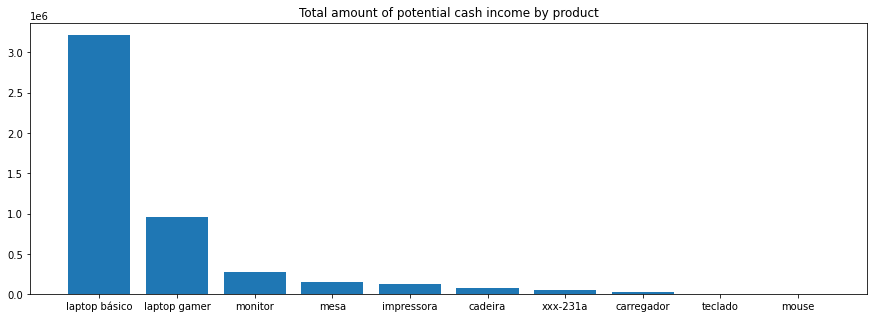

In [55]:
graph_data = df[['product_product', 'product_value']].groupby('product_product').sum().product_value.sort_values(ascending=False)
plt.figure(figsize=(15,5))
plt.title('Total amount of potential cash income by product')
plt.bar(graph_data.index, graph_data.values)

# Subplots

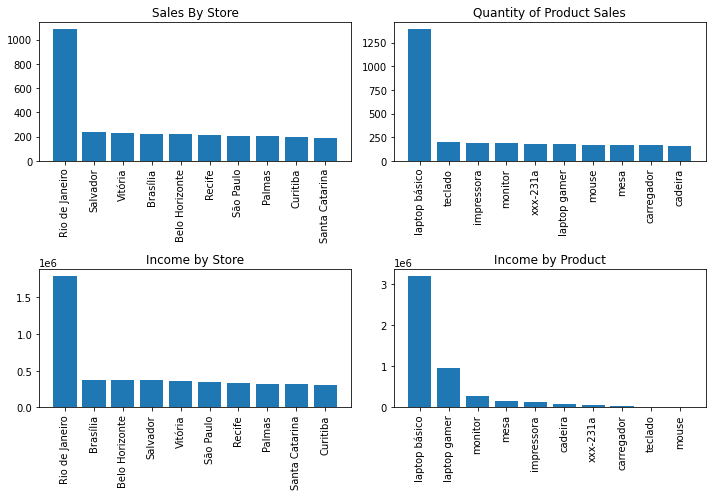

In [56]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
sales_by_store_data = df.groupby('store_city').count().product_value.sort_values(ascending=False)
plt.bar(sales_by_store_data.index, sales_by_store_data.values)
plt.xticks(rotation=90)
plt.title('Sales By Store')

plt.subplot(2,2,2)
product_amount_sales = df.groupby('product_product').count().product_value.sort_values(ascending=False)
plt.bar(product_amount_sales.index, product_amount_sales.values)
plt.xticks(rotation=90)
plt.title('Quantity of Product Sales')

plt.subplot(2,2,3)
income_by_store_data = df.groupby('store_city').sum().product_value.sort_values(ascending=False)
plt.bar(income_by_store_data.index, income_by_store_data.values)
plt.xticks(rotation=90)
plt.title('Income by Store')

plt.subplot(2,2,4)
income_by_product_data = df.groupby('product_product').sum().product_value.sort_values(ascending=False)
plt.bar(income_by_product_data.index, income_by_product_data.values)
plt.xticks(rotation=90)
plt.title('Income by Product')

plt.tight_layout()


## Sales by Client

In [57]:
sales_by_client_data = df[['client_name','product_value']].groupby('client_name').sum().product_value.sort_values(ascending=False)
print(sales_by_client_data)

client_name
Leila Costa         28970.0000
Melissa Lima        25892.2704
Lavinia Carvalho    25261.1352
Fernanda Pinto      24660.0000
Felipe Castro       22920.0000
                       ...    
Julieta Barros         20.0000
Thaís Pinto            20.0000
Giovana Barbosa        20.0000
Diego Sousa            20.0000
José Pinto             20.0000
Name: product_value, Length: 861, dtype: float64


Text(0.5, 1.0, 'Sales by Client')

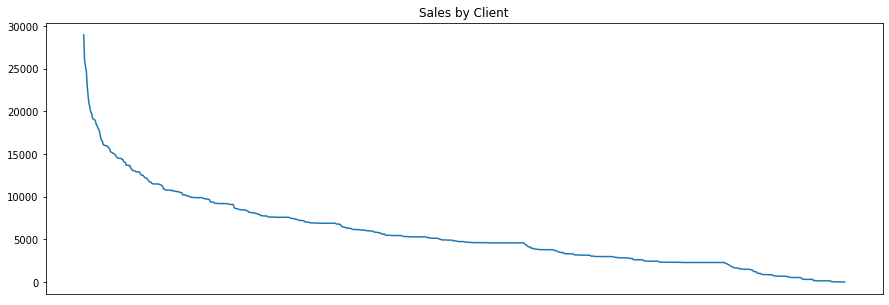

In [58]:
plt.figure(figsize=(15,5))
plt.plot(sales_by_client_data.index, sales_by_client_data.values)
frame = plt.gca().axes.get_xaxis().set_visible(False)
plt.title('Sales by Client')

Text(0.5, 1.0, 'Sales By Client')

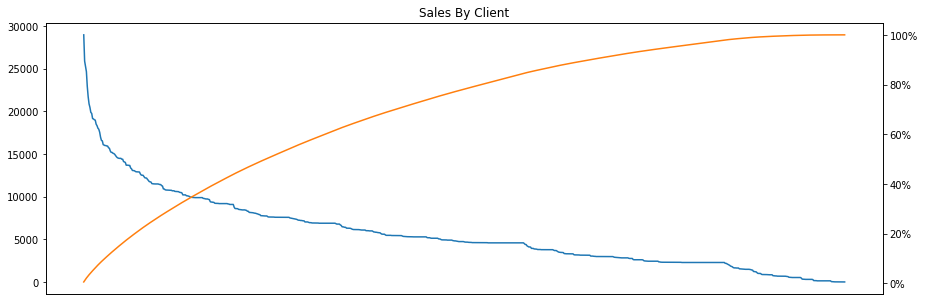

In [59]:
from matplotlib.ticker import PercentFormatter

figure, axis = plt.subplots(figsize=(15,5))
axis.plot(sales_by_client_data.index, sales_by_client_data.values, color='C0')
second_axis = axis.twinx()
second_axis.plot(sales_by_client_data.index, sales_by_client_data.values.cumsum()/sales_by_client_data.values.sum()*100, color='C1')
second_axis.yaxis.set_major_formatter(PercentFormatter())
second_axis.axes.get_xaxis().set_visible(False)
axis.axes.get_xaxis().set_visible(False)
plt.title('Sales By Client')

In [60]:
sales_by_client_cumulative_total = sales_by_client_data.cumsum() / sales_by_client_data.sum()
print(sales_by_client_cumulative_total)

client_name
Leila Costa         0.005913
Melissa Lima        0.011197
Lavinia Carvalho    0.016353
Fernanda Pinto      0.021386
Felipe Castro       0.026064
                      ...   
Julieta Barros      0.999984
Thaís Pinto         0.999988
Giovana Barbosa     0.999992
Diego Sousa         0.999996
José Pinto          1.000000
Name: product_value, Length: 861, dtype: float64


In [61]:
sales_by_client_cumulative_total[sales_by_client_cumulative_total < 0.60].count() / sales_by_client_cumulative_total.count()
## 31 percent of our clients are responsible for 60 percent of our sales

0.3170731707317073

## Pareto's Analysis

Text(0.5, 1.0, "Pareto's Graph - Income by Product")

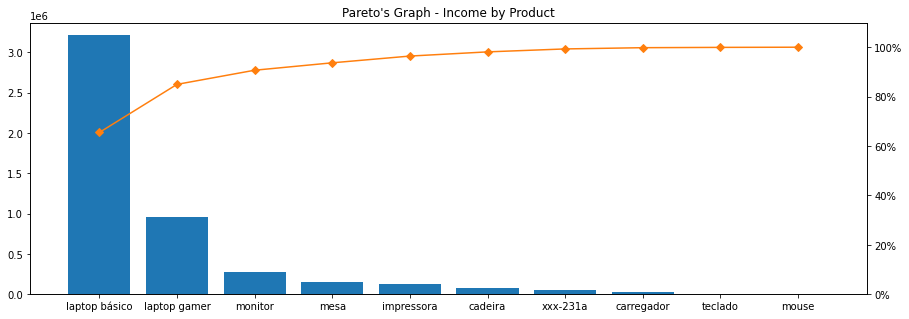

In [62]:
income_by_product_data = df[['product_product','product_value']].groupby('product_product').sum().product_value.sort_values(ascending=False)
figure, axis = plt.subplots(figsize=(15,5))

axis.bar(income_by_product_data.index, income_by_product_data.values, color='C0')
second_axis = axis.twinx()
second_axis.plot(income_by_product_data.index, income_by_product_data.values.cumsum() / income_by_product_data.values.sum() * 100, color='C1', marker='D')
second_axis.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title("Pareto's Graph - Income by Product")

## Sales by product and store

In [64]:
product_store_income_data = pd.DataFrame(columns=('store','product','income'))
for city in df_stores.city:
    for product in df_products.product:
        new_data = {
            'store': city,
            'product' ,
            'income':
        }
        product_store_income_data = product_store_income_data.append(new_data)